## Imports

In [2]:
import numpy as np
import os
from os.path import join
import pandas as pd
from matplotlib import cm
import seaborn as sns
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications import ResNet50
from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.mixture import GaussianMixture
from sklearn.isotonic import IsotonicRegression
import re

plt.style.use('fivethirtyeight')
%matplotlib inline

In [53]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
import torch
import os
import pickle

In [54]:
import numpy as np 
import pandas as pd
import seaborn as sns
import scikitplot as skplt
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Embedding, LSTM, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPool1D, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.feature_extraction.text import TfidfTransformer
from tqdm.auto import tqdm
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import average_precision_score, precision_score, recall_score
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [55]:
from torch import nn
from torch.utils.data import DataLoader, TensorDataset

In [3]:
from sklearn.ensemble import IsolationForest

In [56]:
class cfg:
    FOLD = 0
    SEEDS = [42]
    batch_size = 64
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## Data analyzing

In [30]:
df = pd.read_csv(r'D:\vit\Sem6_VIT\CSE3062P\Preprocessing\Preprocessed_dataset.csv')

In [5]:
df.head()

,Unnamed: 0,ROUTEID,FROMMEASURE,TOMEASURE,XCOORD,YCOORD,ADDTOGIS,ARMSTYLE_DESC,ASSETSTATUS_DESC,ASSETTYPE,...,POLEHEIGHT_DESC,STREETLIGHTID,WATTAGE1,MAXTEMP,HUMIDITY,WINDSPEED,date_timestamp,day,month,year
0,0,11031852,979.774492,1082.634792,396650,140096,2007/06/21 00:00:00+00,Simple Pendant,Active,1,...,30 ft,10599,400,6.490245,93.828940,5.091168,2007-06-21 00:00:00+00:00,21,6,2007
1,2,11084762,395.305351,515.661500,396449,139700,2007/06/21 00:00:00+00,Simple Pendant,Active,1,...,30 ft,10686,400,5.560246,94.832620,4.320000,2007-06-21 00:00:00+00:00,21,6,2007
2,5,11086902,0.000000,92.173896,397112,140598,2007/06/18 00:00:00+00,Regular Alley,Active,2,...,28 ft,13903,150,3.880245,96.165750,3.671294,2007-06-18 00:00:00+00:00,18,6,2007
3,6,11082032,291.747936,392.242800,396777,140902,2007/06/19 00:00:00+00,Regular Alley,Active,2,...,28 ft,14513,400,3.650245,96.980194,4.349896,2007-06-19 00:00:00+00:00,19,6,2007
4,7,11086902,92.173896,216.710551,396484,140445,2007/06/20 00:00:00+00,Regular Alley,Active,2,...,28 ft,10312,70,3.110245,97.793210,5.191994,2007-06-20 00:00:00+00:00,20,6,2007


In [31]:
df.drop(columns=['FACILITYID'], inplace=True)

In [32]:
df.drop(columns=['STREETLIGHTID'], inplace=True)

In [34]:
df.drop(columns=['ADDTOGIS', 'date_timestamp'], inplace=True)

In [37]:
df.drop(columns=['ARMSTYLE_DESC', 'LIGHTTYPE_DESC'], inplace=True)

In [40]:
def get_status(df_row):
    sts_bool = None
    if df_row['ASSETSTATUS_DESC'] == 'Active':
        sts_bool = True
    elif df_row['ASSETSTATUS_DESC'] == 'Inactive':
        sts_bool = False
    else:
        sts_bool = None
    return sts_bool

In [41]:
df['Status'] = df.apply(lambda x: get_status(x), axis=1)
df.drop(columns=['ASSETSTATUS_DESC'], inplace=True)

In [42]:
df.head()

,Unnamed: 0,ROUTEID,FROMMEASURE,TOMEASURE,XCOORD,YCOORD,ASSETTYPE,POLEHEIGHT_DESC,WATTAGE1,MAXTEMP,HUMIDITY,WINDSPEED,day,month,year,Status
0,0,11031852,979.774492,1082.634792,396650,140096,1,30 ft,400,6.490245,93.828940,5.091168,21,6,2007,True
1,2,11084762,395.305351,515.661500,396449,139700,1,30 ft,400,5.560246,94.832620,4.320000,21,6,2007,True
2,5,11086902,0.000000,92.173896,397112,140598,2,28 ft,150,3.880245,96.165750,3.671294,18,6,2007,True
3,6,11082032,291.747936,392.242800,396777,140902,2,28 ft,400,3.650245,96.980194,4.349896,19,6,2007,True
4,7,11086902,92.173896,216.710551,396484,140445,2,28 ft,70,3.110245,97.793210,5.191994,20,6,2007,True


In [44]:
df.drop(columns=['POLEHEIGHT_DESC'], inplace=True)

## IsolationForest

In [45]:
datacopy = df.copy()
datacopy.columns
to_model_cols = datacopy.columns[0:30]
clf = IsolationForest(n_estimators=10, max_samples='auto', contamination=float(.0009), 
                      max_features=1.0, bootstrap=False, n_jobs=-1, random_state=12345, verbose=0)
clf.fit(datacopy[to_model_cols])
pred = clf.predict(datacopy[to_model_cols])
datacopy['Status'] = pred
outliers = datacopy.loc[datacopy['Status']==-1]
outlier_index=list(outliers.index)

print(datacopy['Status'].value_counts())

 1    18640
-1       17
Name: Status, dtype: int64


In [59]:
df1 = df.drop(columns=['Status'], axis=1)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(df1, df['Status'], test_size=0.25, 
                                                    shuffle=True, random_state=42)

## CNN + Transformer

In [58]:
def get_freq(data):
    data_cnt = []
    for i, row in data.iterrows():
        item = np.zeros((18576,))
        cnts = row.value_counts()
        item[cnts.keys()] = cnts.values
        data_cnt.append(item)
    data_cnt = np.stack(data_cnt)
    return data_cnt

In [62]:
transformer = TfidfTransformer()
X_train_cnt = get_freq(X_train)
X_test_cnt = get_freq(X_test)

transformer.fit(X_train_cnt)

X_train_tfidf = transformer.transform(X_train_cnt).toarray()
X_test_tfidf = transformer.transform(X_test_cnt).toarray()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [57]:
trn_dset = TensorDataset(torch.tensor(X_train.values), torch.tensor(y_train.values))
test_dset = TensorDataset(torch.tensor(X_test.values), torch.tensor(y_test.values))
trn_loader = DataLoader(trn_dset, shuffle=True, batch_size=cfg.batch_size)
test_loader = DataLoader(test_dset, shuffle=False, batch_size=cfg.batch_size)

NameError: name 'X_train' is not defined

In [63]:
class CNN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.embedding = nn.Embedding(307, 100)
        self.cnn = nn.Sequential(
            nn.Conv1d(100, 100, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm1d(100),
            nn.Dropout(0.2),
            nn.MaxPool1d(2),
            nn.Conv1d(100, 100, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm1d(100),
            nn.Dropout(0.2),
            nn.MaxPool1d(2),
            nn.Conv1d(100, 100, kernel_size=3, padding=1),
        )
        self.pool = nn.AdaptiveAvgPool1d(1)
        self.classifier = nn.Sequential(
            nn.Linear(100, 100),
            nn.ReLU(),
            nn.Linear(100, 1),
            nn.Sigmoid()
        )
    
    def forward(self, inp):
        emb = self.embedding(inp)
        gl_feats = self.pool(self.cnn(emb.permute(0,2,1))).squeeze(-1)
        probs = self.classifier(gl_feats).squeeze(-1)
        return probs

In [64]:
def train_nn(net, optimizer, trn_loader, test_loader):
    trn_losses = []
    trn_accs = []
    test_losses = []
    test_accs = []

    for epoch in tqdm(range(50)):
        net.train()
        loss = 0
        acc = 0
        total = 0
        for inp, label in trn_loader:
            inp = inp.to(cfg.device)
            label = label.to(cfg.device)
            bs = label.shape[0]
            pred = net(inp)
            _loss = loss_fn(pred, label.float())
            _acc = acc_fn(pred, label)
            optimizer.zero_grad()
            _loss.backward()
            optimizer.step()
            loss += _loss.item() * bs
            acc += _acc.item() * bs
            total += bs
        loss = loss/total
        acc = acc/total
        trn_losses.append(loss)
        trn_accs.append(acc)

        net.eval()
        loss = 0
        acc = 0
        total = 0
        with torch.no_grad():
            for inp, label in test_loader:
                inp = inp.to(cfg.device)
                label = label.to(cfg.device)
                bs = label.shape[0]
                pred = net(inp)
                _loss = loss_fn(pred, label.float())
                _acc = acc_fn(pred, label)
                loss += _loss.item() * bs
                acc += _acc.item() * bs
                total += bs
        loss = loss/total
        acc = acc/total
        test_losses.append(loss)
        test_accs.append(acc)
        torch.save(net.state_dict(), f'checkpoint-epoch{epoch}.pth')
    best_epoch = np.argmax(test_accs)
    print(best_epoch, trn_accs[best_epoch], test_accs[best_epoch])
    net.load_state_dict(torch.load(f'checkpoint-epoch{best_epoch}.pth'))
    net.eval()
    prediction = []
    with torch.no_grad():
        for inp, label in test_loader:
            inp = inp.to(cfg.device)
            label = label.to(cfg.device)
            bs = label.shape[0]
            pred = net(inp)
            prediction.append(pred.data.cpu().numpy())
    prediction = np.concatenate(prediction, axis=0)
    return prediction

In [ ]:
for name, NN in nn_dict.items():
    net = NN().to(cfg.device)
    optimizer = torch.optim.Adam(net.parameters(), lr=3e-4)
    print(name)
    prediction = train_nn(net, optimizer, trn_loader, test_loader)
    precision = precision_score(y_test, prediction>0.5)
    recall = recall_score(y_test, prediction>0.5)
    print(precision, recall

## Result

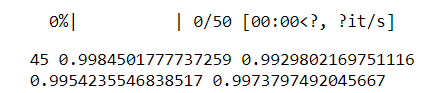